In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,183,0,0,0,28.4,0.212,36,1
1,5,162,104,0,0,37.7,0.151,52,1
2,2,197,70,99,0,34.7,0.575,62,1
3,13,158,114,0,0,42.3,0.257,44,1
4,0,162,76,56,100,53.2,0.759,25,1
...,...,...,...,...,...,...,...,...,...
503,7,179,95,31,0,34.2,0.164,60,0
504,0,113,76,0,0,33.3,0.278,23,1
505,3,128,72,25,190,32.4,0.549,27,1
506,1,119,88,41,170,45.3,0.507,26,0


In [5]:
df.shape[0]
df.columns[:]
display(df.head())
display(df.info())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,183,0,0,0,28.4,0.212,36,1
1,5,162,104,0,0,37.7,0.151,52,1
2,2,197,70,99,0,34.7,0.575,62,1
3,13,158,114,0,0,42.3,0.257,44,1
4,0,162,76,56,100,53.2,0.759,25,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               508 non-null    int64  
 1   Glucose                   508 non-null    int64  
 2   BloodPressure             508 non-null    int64  
 3   SkinThickness             508 non-null    int64  
 4   Insulin                   508 non-null    int64  
 5   BMI                       508 non-null    float64
 6   DiabetesPedigreeFunction  508 non-null    float64
 7   Age                       508 non-null    int64  
 8   Outcome                   508 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.8 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.913386,120.911417,68.474409,19.566929,80.232283,31.764173,0.460567,33.346457,0.344488
std,3.305064,31.786424,20.436203,16.275653,119.686281,8.072185,0.322653,11.768060,0.475670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,26.600000,0.248000,24.000000,0.000000
50%,3.000000,117.000000,71.000000,22.000000,0.000000,32.000000,0.375000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.625000,0.591500,41.000000,1.000000
max,14.000000,198.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


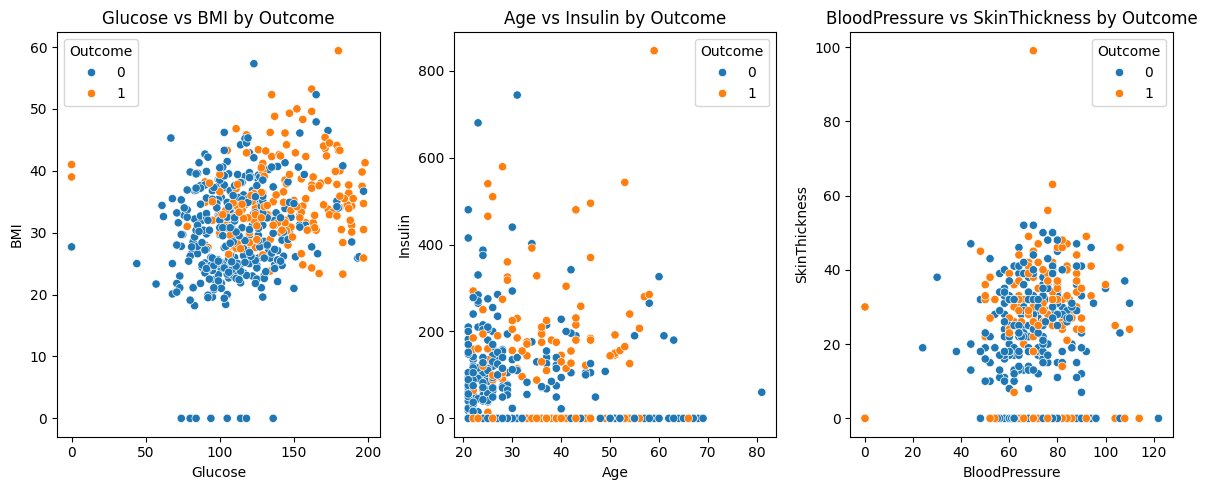

In [6]:
# Plot Glucose vs BMI
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glucose vs BMI by Outcome')

# Plot Age vs Insulin
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Insulin', hue='Outcome', data=df)
plt.title('Age vs Insulin by Outcome')

# Plot BloodPressure vs SkinThickness
plt.subplot(1, 3, 3)
sns.scatterplot(x='BloodPressure', y='SkinThickness', hue='Outcome', data=df)
plt.title('BloodPressure vs SkinThickness by Outcome')

plt.tight_layout()
plt.show()

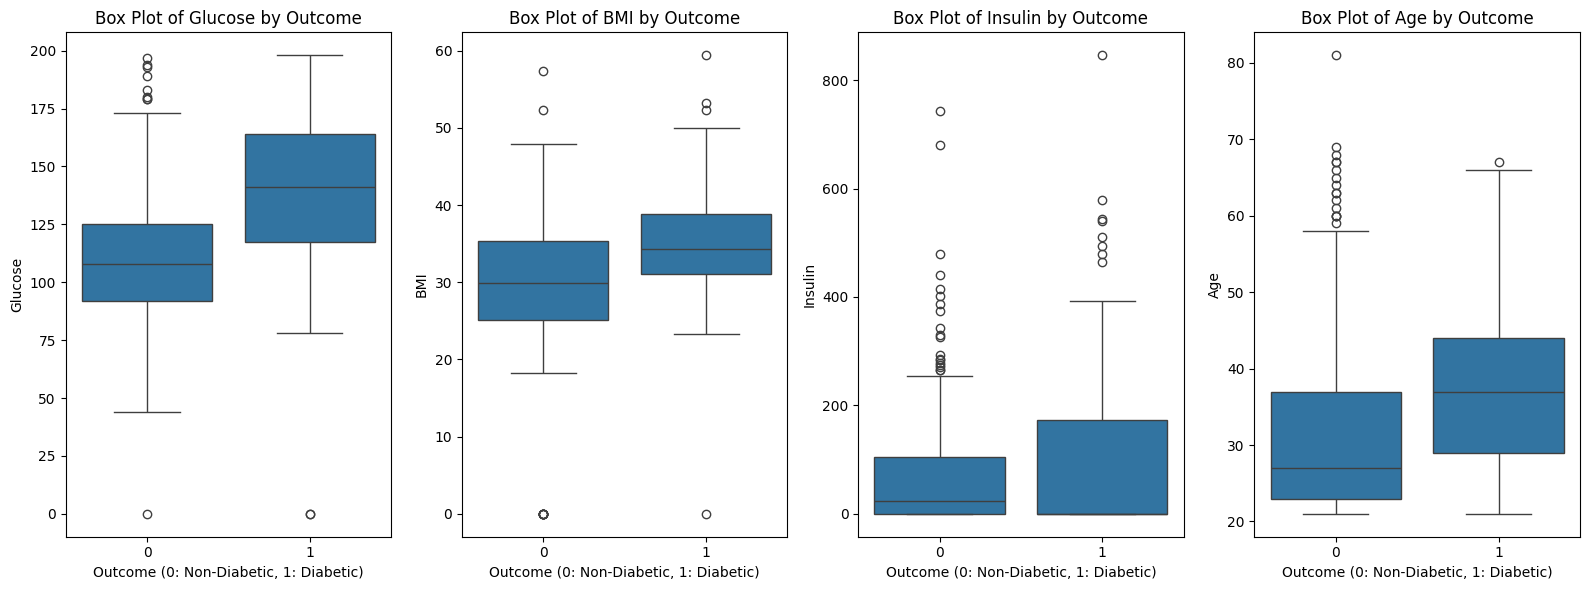

In [7]:
# box plots for Glucose, BMI, Insulin, and Age
features_to_plot = ['Glucose', 'BMI', 'Insulin', 'Age']
plt.figure(figsize=(16, 6))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Outcome')
    plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

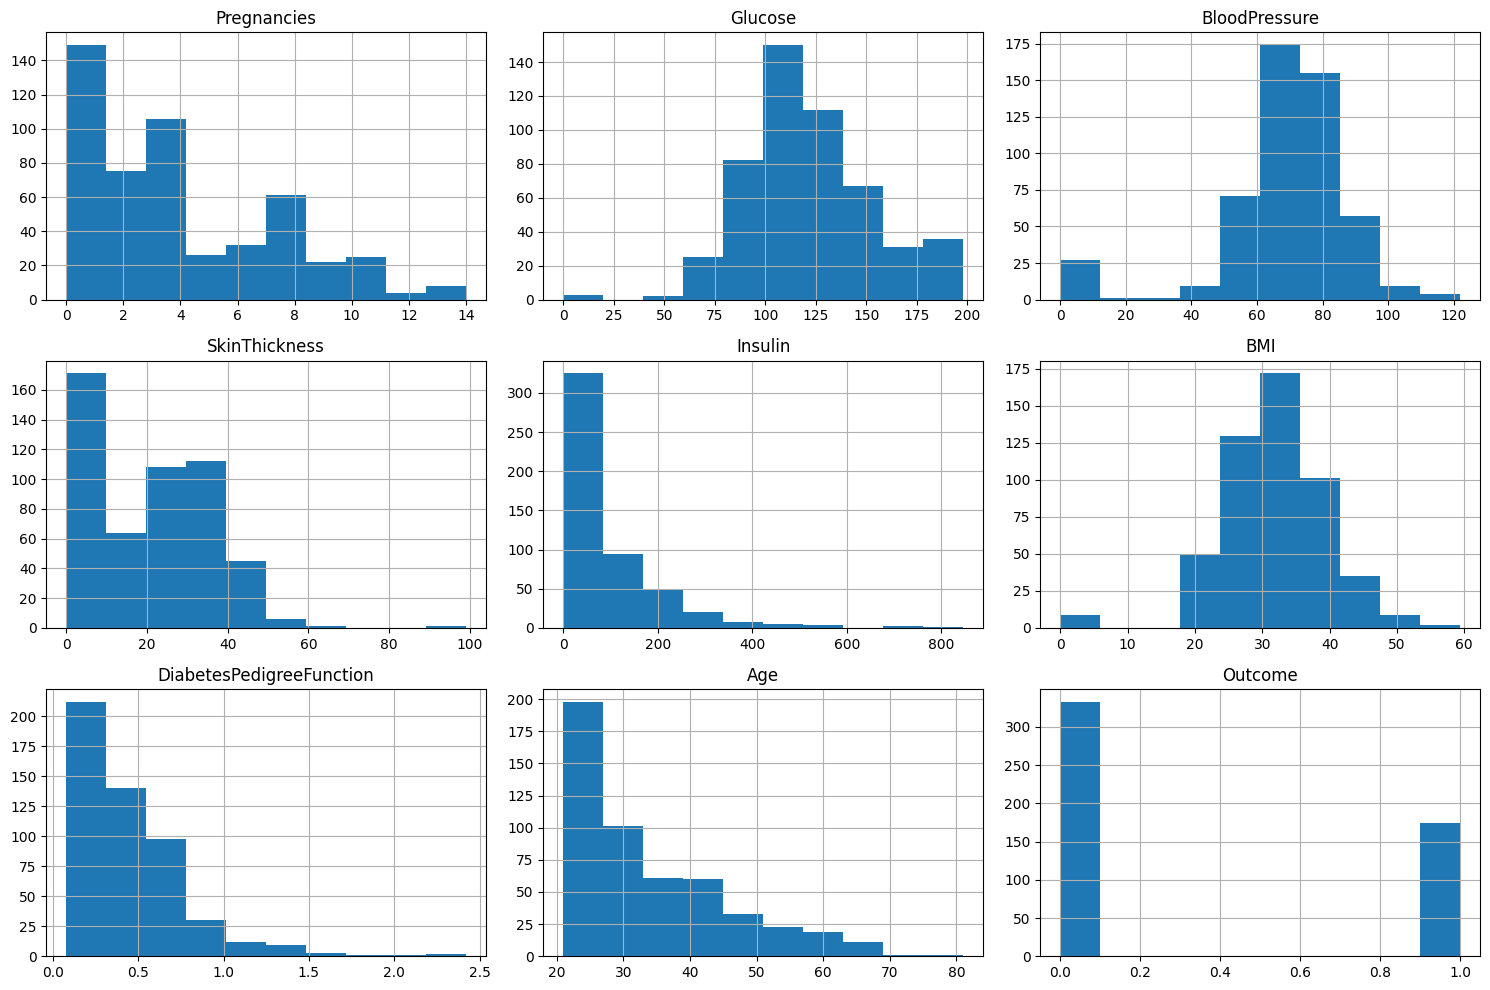

In [8]:
# histograms for each numerical feature
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

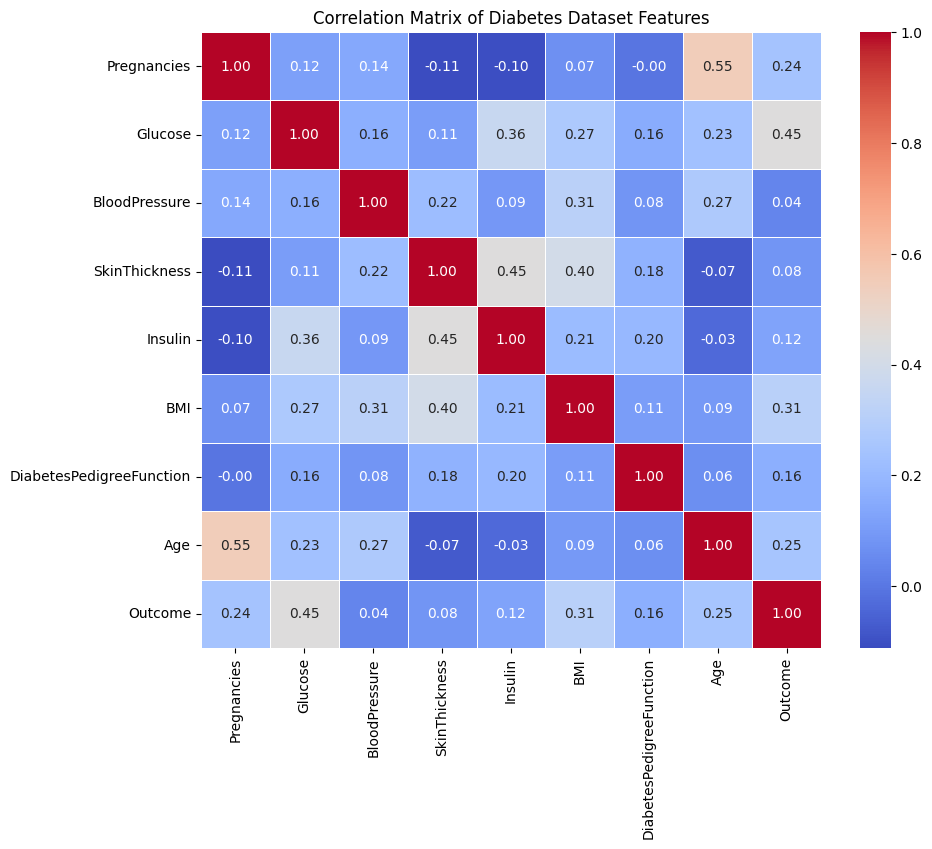

In [9]:
#correlation matrix
correlation_matrix = df.corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

Based on the visualizations:

Scatter plots: The scatter plots show some separation between diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals based on Glucose and BMI, as well as Age and Insulin, and BloodPressure and SkinThickness. This suggests these features might be useful in predicting diabetes.

Box plots: The box plots clearly show higher median values for Glucose, BMI, and Age in the diabetic group compared to the non-diabetic group. The spread of values for Insulin is much wider for the diabetic group, with many outliers.
Histograms: The histograms reveal the distribution of each feature. Some features, like Glucose and BMI, appear to have roughly normal distributions, while others, like Pregnancies and DiabetesPedigreeFunction, are skewed. There are also instances of zero values in Glucose, BloodPressure, SkinThickness, and Insulin, which might represent missing data or be clinically relevant depending on the context.

Correlation matrix: The heatmap shows the correlation between features. Glucose has the strongest positive correlation with Outcome, followed by BMI and Age. Pregnancies also shows a positive correlation with Outcome. Insulin and SkinThickness have moderate positive correlations with each other.
Overall, the visualizations indicate that Glucose, BMI, Age, and Pregnancies are potentially important features for predicting diabetes in this dataset. The presence of zero values in some features and the wide spread of Insulin values for the diabetic group might warrant further investigation and data cleaning.